### Exercici 1 (Nivell 1)
#### Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [3]:
#importing python libraries and modules

import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import warnings #library to manage warnings
import scipy #library with algorithms for statistics and scientific computing
from sklearn.linear_model import LinearRegression #regression algorithm
from sklearn.ensemble import RandomForestRegressor #regression algorithm
from sklearn.tree import DecisionTreeRegressor #regression algorithm
from sklearn.model_selection import GridSearchCV #optimization parameter algorithm
from sklearn.model_selection import cross_val_score #cross validation algorithm
from sklearn.model_selection import train_test_split #train test split 
from sklearn.metrics import mean_squared_error #MSE calculation
from sklearn.metrics import mean_absolute_error #MAE calculation
from sklearn.metrics import r2_score #coefficient of determination calculation
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

In [4]:
#importing dataset

df_flight_imported = pd.read_csv('DelayedFlights.csv', index_col=0)

#we take a sample to speed up the algorithm
#this may affect to results
df_flight = df_flight_imported.sample(100000)

In [5]:
#dataset information

print(df_flight.info(null_counts=True))
df_flight.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 5682056 to 3599538
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               100000 non-null  int64  
 1   Month              100000 non-null  int64  
 2   DayofMonth         100000 non-null  int64  
 3   DayOfWeek          100000 non-null  int64  
 4   DepTime            100000 non-null  float64
 5   CRSDepTime         100000 non-null  int64  
 6   ArrTime            99653 non-null   float64
 7   CRSArrTime         100000 non-null  int64  
 8   UniqueCarrier      100000 non-null  object 
 9   FlightNum          100000 non-null  int64  
 10  TailNum            100000 non-null  object 
 11  ActualElapsedTime  99578 non-null   float64
 12  CRSElapsedTime     99993 non-null   float64
 13  AirTime            99578 non-null   float64
 14  ArrDelay           99578 non-null   float64
 15  DepDelay           100000 non-null  float64


,count,mean,std,min,25%,50%,75%,max
Year,100000.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.00,2008.0
Month,100000.0,6.120900,3.485247,1.0,3.0,6.0,9.00,12.0
DayofMonth,100000.0,15.742140,8.766615,1.0,8.0,16.0,23.00,31.0
DayOfWeek,100000.0,3.987400,1.994558,1.0,2.0,4.0,6.00,7.0
DepTime,100000.0,1517.982610,451.885171,1.0,1203.0,1545.0,1901.00,2400.0
CRSDepTime,100000.0,1466.828250,425.994317,1.0,1135.0,1510.0,1820.00,2359.0
ArrTime,99653.0,1608.228061,549.856272,1.0,1314.0,1714.0,2031.00,2400.0
CRSArrTime,100000.0,1632.634120,466.525299,0.0,1324.0,1705.0,2015.00,2400.0
FlightNum,100000.0,2187.301550,1946.763453,1.0,607.0,1545.0,3427.00,7829.0
ActualElapsedTime,99578.0,133.025196,71.704471,17.0,80.0,116.0,164.75,666.0


#### Dataset Explanation

1. Year: 2008
2. Month: 1-12
3. DayofMonth: 1-31
4. DayOfWeek: 1 (Monday) - 7 (Sunday)
5. DepTime: actual departure time (local, hhmm)
6. CRSDepTime: scheduled departure time (local, hhmm)
6. ArrTime: actual arrival time (local, hhmm)
6. CRSArrTime: scheduled arrival time (local, hhmm)
6. UniqueCarrier: unique carrier code
6. FlightNum: flight number
6. TailNum: plane tail number: aircraft registration, unique aircraft identifier
6. ActualElapsedTime: in minutes
6. CRSElapsedTime: in minutes
6. AirTime: in minutes
6. ArrDelay: arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
6. DepDelay: departure delay, in minutes
6. Origin: origin IATA airport code
6. Dest: destination IATA airport code
6. Distance: in miles
6. TaxiIn: taxi in time (the movement of an aircraft on the ground after landing), in minutes
6. TaxiOut: taxi out time (the movement of an aircraft on the ground before taking off), in minutes
6. Cancelled: 1 = yes, 0 = no
6. CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
6. Diverted: 1 = yes, 0 = no
6. CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
6. WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
6. NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
6. SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
6. LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

#### Conclusions from dataset:
- some columns have many NaN values
- if object types (5) are going to be used as a predictors, they should be converted from categorical to numerical

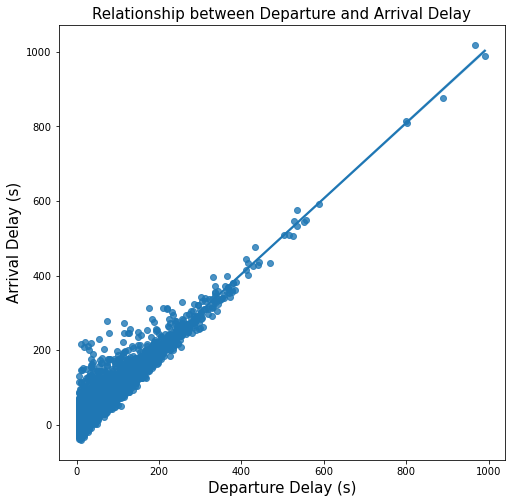

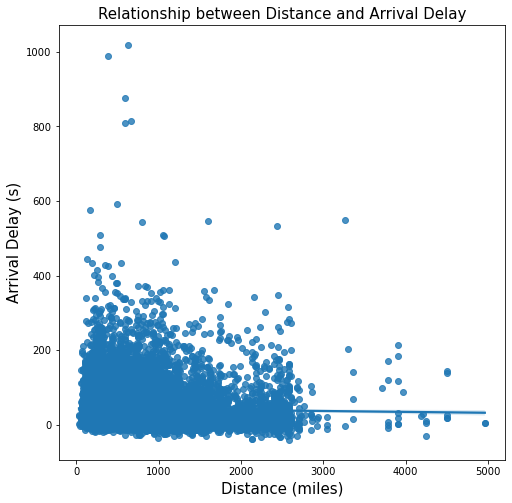

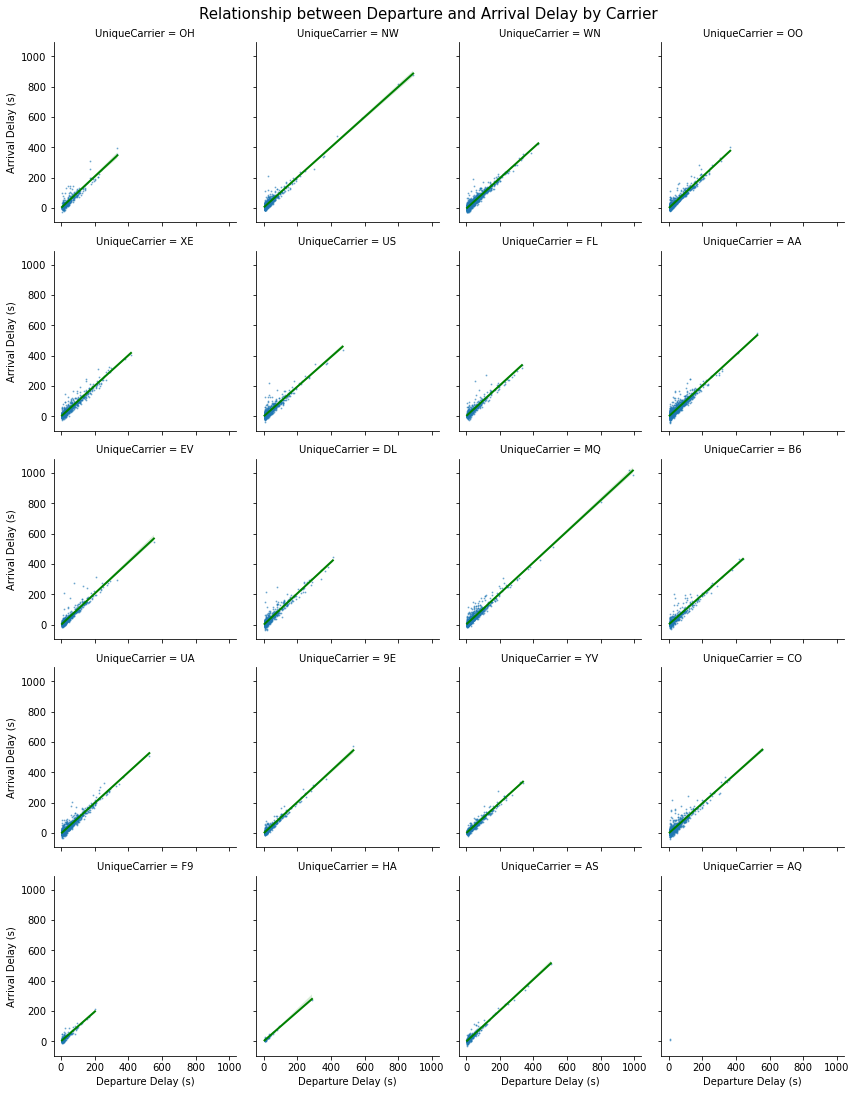

In [6]:
#plotting

#we take a sample to speed up plotting
df_flight_sample=df_flight_imported.sample(15000)

fig1, ax1 = plt.subplots(figsize=(8,8))
fig1 = sns.regplot(x="DepDelay", y="ArrDelay", data=df_flight_sample)
ax1.set_title("Relationship between Departure and Arrival Delay", fontsize=15)
ax1.set_xlabel("Departure Delay (s)", fontsize=15)
ax1.set_ylabel("Arrival Delay (s)", fontsize=15)

fig2, ax2 = plt.subplots(figsize=(8,8))
fig2 = sns.regplot(x="Distance", y="ArrDelay", data=df_flight_sample)
ax2.set_title("Relationship between Distance and Arrival Delay", fontsize=15)
ax2.set_xlabel("Distance (miles)", fontsize=15)
ax2.set_ylabel("Arrival Delay (s)", fontsize=15)

fig3 = sns.lmplot(x="DepDelay", y="ArrDelay", col="UniqueCarrier", data=df_flight_sample, 
                  col_wrap=4, height=3, scatter_kws={'s': 0.8, 'alpha': 0.5}, line_kws={'lw': 2, 'color': 'green'})
fig3.fig.suptitle('Relationship between Departure and Arrival Delay by Carrier', fontsize=15, y=1.01)
fig3.set_axis_labels("Departure Delay (s)", "Arrival Delay (s)")


#### Conclusions from plotting: 
- It is clear a linear relationship between delay at departure and arribal
- But distance looks like it does not affect delay at arribal delays
- Carriers have the same relationship between delay at departure and arribal, but  some of them have bigger delays

### Pre-Processing

- Some features and observations does not give useful information. They will be deleted.
- As we have a lot of observations, we can delete all observations with NaN values.
- We will also remove categorical features because we have enough features to predict, so when can avoid more columns with one-hot encoding. If we need to improve prediction, then we can add it later.

#### Observations to delete
- all flights cancelled (column 'Cancelled' = 1)
- all flights diverted (column 'Diverted' = 1)

#### Features to remove
- column 'Cancelled'
- column 'Diverted'
- column 'Year'
- column 'CancellationCode'

#### Categorical Features to remove
- column 'Unique Carrier'
- column 'TailNum'
- column 'Origin'
- column 'Dest'

In [7]:
#pre-processing

#we make a copy to apply pre-processing
df_flight_pre = df_flight

#removing observations that are not useful
df_flight_pre.drop(df_flight[df_flight['Cancelled'] == 1].index, inplace=True)
df_flight_pre.drop(df_flight[df_flight['Diverted'] == 1].index, inplace=True)

#removing features that are not useful and/or categorical
columns = ['Year','Cancelled', 'Diverted', 'CancellationCode','UniqueCarrier', 'TailNum', 'Origin', 'Dest']
df_flight_pre.drop(columns=columns, inplace=True)

#removing all rows with NaN values
df_flight_pre.dropna(inplace=True)

- We select predictors and target.

In [8]:
#selecting predictors X and target y
predictors = ['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime',
             'CRSArrTime','FlightNum','DepDelay',
             'Distance','CarrierDelay','WeatherDelay','NASDelay',
              'SecurityDelay','LateAircraftDelay']
target = ['ArrDelay']

X = df_flight_pre[predictors]
y = df_flight_pre[target]

#splitting in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=1)

In [9]:
#regression models
model1 = 'SLR/MLR (Single/Multiple linear Regression)'
model2 = 'Decision Tree Regression'
model3 = 'Random Forest Regression'

model_1 = LinearRegression().fit(X_train, y_train)
model_2 = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
model_3 = RandomForestRegressor(random_state=0).fit(X_train, y_train)

#### Evaluation Metrics:

- R2: It is the coefficient of determination. It measures the amount of variance in the predictions. Best score is 1.0 or -1.0. Worst score is 0.0.
- MSE (Mean Square Error): It is the average of the square of the errors, where error is the difference between an observed value and its predicted value. There is no correct value for MSE, the lower the value the better. 0 means the model is perfect.
- MAE (Mean Absolute Error): It is the average of all absolute errors. The absolute error is the absolute value of the difference between each actual value and its predicted value. The lower the value the better.

In [10]:
#model 1

#we obtain R2, intercept and slope from train data
R2_train1 = model_1.score(X_train, y_train)
intercept_b0 = model_1.intercept_
slope_b1 = model_1.coef_

#we obtain predicted values from test data
y_pred1 = model_1.predict(X_test)

#Evaluation Metrics
#MSE
MSE_1 = round(mean_squared_error(y_test, y_pred1),3)

#MAE
MAE_1 = round(mean_absolute_error(y_test, y_pred1),3)

#R2 from predicted data
r2_test1 = round(r2_score(y_test, y_pred1),3)


In [11]:
#model 2

#we obtain R2 from train data
R2_train2 = model_2.score(X_train, y_train)

#we obtain predicted values from test data
y_pred2 = model_2.predict(X_test)

#Evaluation Metrics

#MSE
MSE_2 = round(mean_squared_error(y_test, y_pred2),3)

#MAE
MAE_2 = round(mean_absolute_error(y_test, y_pred2),3)

#R2 from predicted data
r2_test2 = round(r2_score(y_test, y_pred2),3)


In [12]:
#model 3

#we obtain R2 from train data
R2_train3 = model_3.score(X_train, y_train)

#we obtain predicted values from test data
y_pred3 = model_3.predict(X_test)

#Evaluation Metrics

#MSE
MSE_3 = round(mean_squared_error(y_test, y_pred3),3)

#MAE
MAE_3 = round(mean_absolute_error(y_test, y_pred3),3)

#R2 from predicted data
r2_test3 = round(r2_score(y_test, y_pred3),3)

### Exercici 2 (Nivell 1)
#### Compara’ls en base al MSE i al R2.

## Comparative Table

In [13]:

df_EvaluationMetrics = pd.DataFrame(data=[[r2_test1, MSE_1, MAE_1],[r2_test2, MSE_2, MAE_2],[r2_test3, MSE_3, MAE_3]], 
                                    columns=['R2','MSE', 'MAE'], index=[model1, model2, model3])
df_EvaluationMetrics

,R2,MSE,MAE
SLR/MLR (Single/Multiple linear Regression),1.000,0.000,0.000
Decision Tree Regression,0.988,47.246,2.161
Random Forest Regression,0.993,26.723,1.553


### Conclusions:

- The Multiple linear Regression algorithm is the most simple model but it fits exactly. The ratio between computing work and results is excellent.
- The other two algorithms work well, but they are more complex, they need more computing work and they does not fit as well as Linear.
- Tuning parameters, applying feature engineering or taking more predictors can improve results for the Decision Tree and Random Forest algorithm.

### Exercici 3 (Nivell 1)
#### Entrena’ls utilitzant els diferents paràmetres que admeten.

In [14]:
#parameters for Model 1
print(model1)
print('\nDefault Parameters:')
print(model_1.get_params())

#training model 1
#there are no parameters to fit this model, because is quite simple

SLR/MLR (Single/Multiple linear Regression)

Default Parameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


In [15]:
#parameters for Model 2
print(model2)
print('\nDefault Parameters:')
print(model_2.get_params())

#training model 2

#estimator
model_2_est = DecisionTreeRegressor(random_state=0)

#selection of parameters and creating a dict for grid tool
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_features = ['sqrt', 'log2']

param_grid2 = dict(criterion=criterion, splitter=splitter, max_features=max_features)

#launching grid tool
model_2_grid = GridSearchCV(estimator=model_2_est, param_grid=param_grid2, n_jobs=-1)
model_2_result = model_2_grid.fit(X_train, y_train)

#results
print('\n')
print('Best Score: ', model_2_result.best_score_)
print('Best Params: ', model_2_result.best_params_)

Decision Tree Regression

Default Parameters:
{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


Best Score:  0.9069556414980804
Best Params:  {'criterion': 'friedman_mse', 'max_features': 'sqrt', 'splitter': 'best'}


In [16]:
#parameters for Model 3
print(model3)
print('\nDefault Parameters:')
print(model_3.get_params())

#training model 3

#estimator
model_3_est = RandomForestRegressor(random_state=0)

#selection of parameters and creating a dict for grid tool
criterion = ['squared_error', 'absolute_error', 'poisson']
n_estimators = [10, 20, 30]
max_features = ['auto', 'None']

param_grid3 = dict(criterion=criterion, n_estimators=n_estimators, max_features=max_features)

#launching grid tool
model_3_grid = GridSearchCV(estimator=model_3_est, param_grid=param_grid3, n_jobs=-1)
model_3_result = model_3_grid.fit(X_train, y_train)

#results
print('\n')
print('Best Score: ', model_3_result.best_score_)
print('Best Params: ', model_3_result.best_params_)

Random Forest Regression

Default Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


Best Score:  0.9775977396198756
Best Params:  {'criterion': 'poisson', 'max_features': 'auto', 'n_estimators': 20}


## Comparative Table

In [17]:
#comparation R2 standard and R2 with best parameters

df_EvaluationMetrics_param = pd.DataFrame(data=[[r2_test2, model_2_result.best_score_],[r2_test3, model_3_result.best_score_]], 
                                    columns=['R2 Default','R2 Hypertuned'], index=[model2, model3])
df_EvaluationMetrics_param



,R2 Default,R2 Hypertuned
Decision Tree Regression,0.988,0.906956
Random Forest Regression,0.993,0.977598


### Conclusions:

- The parameters that we chose to train the algorith with the GridSearch does not improve default parameters for R2.
- Maybe we can try with others parameters, but it takes a lot of computing power, specially the Random Forest algorithm.

### Exercici 4 (Nivell 1)
#### Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna).

In [20]:
model1_cross = np.round(cross_val_score(LinearRegression(), X, y),3)
model2_cross = np.round(cross_val_score(model_2_est, X, y),3)
model3_cross = np.round(cross_val_score(model_3_est, X, y),3)

## Comparative Table

In [112]:
#comparation R2 standard and R2 with cross-validation

df_EvaluationMetrics_cv = pd.DataFrame(data=[[r2_test1, model1_cross],[r2_test2, model2_cross],[r2_test3, model3_cross]], 
                                    columns=['R2 Train-Test','R2 Cross-Validation'], index=[model1, model2, model3])
df_EvaluationMetrics_cv



,R2 Train-Test,R2 Cross-Validation
SLR/MLR (Single/Multiple linear Regression),1.000,"[1.0, 1.0, 1.0, 1.0, 1.0]"
Decision Tree Regression,0.984,"[0.986, 0.989, 0.988, 0.985, 0.986]"
Random Forest Regression,0.992,"[0.991, 0.994, 0.993, 0.992, 0.994]"


### Conclusions:

- The cross-validation improves a little both algorithms.

### Exercici 5 (Nivell 2)
#### Realitza algun procés d’enginyeria de variables per millorar-ne la predicció.

We will try to apply a feature engineering tool to improve predictions.

As we have a lot of features with different measurement units, we are going to use the MixMaxScaler to unify all features units to the scale from 0 to 1.

In [131]:
model_1sc = LinearRegression().fit(X_train, y_train)
model_2sc = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
model_3sc = RandomForestRegressor(random_state=0).fit(X_train, y_train)

#selecting predictors X and target y
predictors = ['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime',
             'CRSArrTime','FlightNum','DepDelay',
             'Distance','CarrierDelay','WeatherDelay','NASDelay',
              'SecurityDelay','LateAircraftDelay']
target = ['ArrDelay']

#applying minmaxscaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df_flight_pre[predictors])
y = scaler.fit_transform(df_flight_pre[target])

#splitting in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=1)

In [132]:
#we obtain predicted values from test data
y_pred1sc = model_1sc.predict(X_test)
y_pred2sc = model_2sc.predict(X_test)
y_pred3sc = model_3sc.predict(X_test)

#MSE
MSE_sc1 = round(mean_squared_error(y_test, y_pred1sc),3)
MSE_sc2 = round(mean_squared_error(y_test, y_pred2sc),3)
MSE_sc3 = round(mean_squared_error(y_test, y_pred3sc),3)

#R2 from predicted data
r2_sc1 = round(r2_score(y_test, y_pred1sc),3)
r2_sc2 = round(r2_score(y_test, y_pred2sc),3)
r2_sc3 = round(r2_score(y_test, y_pred3sc),3)

### Comparative Table 

In [133]:
df_EvaluationMetrics_sc = pd.DataFrame(data=[[r2_test1, MSE_1, r2_sc1, MSE_sc1],
                                          [r2_test2, MSE_2, r2_sc2, MSE_sc2],[r2_test3, MSE_3, r2_sc3, MSE_sc3]], 
                                    columns=['R2','MSE', 'R2 scaler', 'MSE scaler'], index=[model1, model2, model3])
df_EvaluationMetrics_sc

,R2,MSE,R2 scaler,MSE scaler
SLR/MLR (Single/Multiple linear Regression),1.000,0.000,1.000,0.0
Decision Tree Regression,0.984,57.371,0.984,0.0
Random Forest Regression,0.992,30.388,0.992,0.0


### Conclusions:

- Applying feature engineering improves the algorithm performance

### Exercici 6 (Nivell 3)
#### No utilitzis la variable DepDelay a l’hora de fer prediccions.

We will delete the 'DepDelay' from the predictors, and compare results

In [24]:
#selecting predictors X and target y
predictors = ['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime',
             'CRSArrTime','FlightNum',
             'Distance','CarrierDelay','WeatherDelay','NASDelay',
              'SecurityDelay','LateAircraftDelay']
target = ['ArrDelay']

X = df_flight_pre[predictors]
y = df_flight_pre[target]

#splitting in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=1)

model_1ND = LinearRegression().fit(X_train, y_train)
model_2ND = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
model_3ND = RandomForestRegressor(random_state=0).fit(X_train, y_train)

#we obtain predicted values from test data
y_pred1ND = model_1ND.predict(X_test)
y_pred2ND = model_2ND.predict(X_test)
y_pred3ND = model_3ND.predict(X_test)

#MSE
MSE_ND1 = round(mean_squared_error(y_test, y_pred1ND),3)
MSE_ND2 = round(mean_squared_error(y_test, y_pred2ND),3)
MSE_ND3 = round(mean_squared_error(y_test, y_pred3ND),3)

#R2 from predicted data
r2_ND1 = round(r2_score(y_test, y_pred1ND),3)
r2_ND2 = round(r2_score(y_test, y_pred2ND),3)
r2_ND3 = round(r2_score(y_test, y_pred3ND),3)

### Comparative Table

In [25]:
df_EvaluationMetrics_ND = pd.DataFrame(data=[[r2_test1, MSE_1, r2_ND1, MSE_ND1],
                                          [r2_test2, MSE_2, r2_ND2, MSE_ND2],[r2_test3, MSE_3, r2_ND3, MSE_ND3]], 
                                    columns=['R2','MSE', 'R2 No Delay', 'MSE No Delay'], index=[model1, model2, model3])
df_EvaluationMetrics_ND

,R2,MSE,R2 No Delay,MSE No Delay
SLR/MLR (Single/Multiple linear Regression),1.000,0.000,1.000,0.000
Decision Tree Regression,0.987,49.791,0.968,124.743
Random Forest Regression,0.991,32.970,0.981,71.993


### Conclusions:

- The Linear Regression algorithm is not affected when we remove this feature.
- Decision tree and Random Forest are affected when this feature is not available, and results get worse.
- To compensate this, we could add other features that we did not use, like categorical features or try with other parameters or algorithms.
